In [157]:
import numpy as np
from matplotlib import pyplot as plt

In [158]:
class Daniel:

    def __init__(self, opornosc, napiecie, Cu, Zn):   
        self.opornosc=np.array(opornosc)
        self.napiecie=np.array(napiecie)/10
        self.Cu=np.array(Cu)/1000
        self.Zn=np.array(Zn)/10
        self.I=self.napiecie/self.opornosc 
        self.P=self.I*self.napiecie*1000  #[mW]
        self.SEM=self.napiecie[0]
        self.I=self.I*1000 #[mA]
    def E_el(self):
        E_el=self.SEM*2*96485
        return E_el
    def R_w(self):
        R_w=(self.SEM-(self.I/1000)*self.opornosc)/(self.I/1000) 
        return R_w
    def regresja(self):
        a=np.polyfit(self.I, self.P,2)[0]
        b=np.polyfit(self.I, self.P,2)[1]
        c=np.polyfit(self.I, self.P,2)[2]
        r=np.polyfit(self.I, self.P,2,full=True)[1]
        R2=1 - r / sum((self.P - self.P.mean())**2) 
        zero=np.max([(-b-np.sqrt(b**2-4*a*c))/(2*a),(-b+np.sqrt(b**2-4*a*c))/(2*a)])
        max=-b/(2*a)

        return [a,b,c],R2,[zero,max]
   
class Leclanche:
    
    def __init__(self,opornosc,napiecie):
        self.napiecie=np.array(napiecie)/10
        self.opornosc=np.array(opornosc)
        self.I=self.napiecie/self.opornosc
        self.P=self.I*self.napiecie

In [159]:
#C=0.5 M

D05=Daniel([1000000,
800000,
600000,
400000,
200000,
100000,
80000,
60000,
40000,
20000,
10000,
8000,
6000,
4000,
2000,
1000,
800,
600,
400,
200,
100],[10.949,
10.945,
10.953,
10.947,
10.929,
10.873,
10.875,
10.847,
10.788,
10.520,
10.308,
10.158,
9.919,
9.468,
8.339,
6.733,
6.120,
5.300,
4.155,
2.580,
1.486],
[941.000,
922.000,
928.000,
929.000,
928.000,
928.000,
930.000,
928.000,
922.000,
917.000,
909.000,
904.000,
896.000,
871.000,
815.000,
732.000,
664.000,
526.000,
314.000,
300.000,
360.000],
[-10.248,
-10.263,
-10.260,
-10.259,
-10.255,
-10.252,
-10.249,
-10.246,
-10.239,
-10.227,
-10.219,
-10.203,
-10.194,
-10.178,
-10.148,
-10.113,
-10.100,
-10.085,
-10.066,
-10.036,
-9.995])

In [160]:
D005=Daniel([1000000.000,
800000.000,
600000.000,
400000.000,
200000.000,
100000.000,
80000.000,
60000.000,
40000.000,
20000.000],
[10.742,
10.743,
10.736,
10.724,
10.690,
10.618,
10.580,
10.525,
10.420,
10.130],
[286.0000,
280.0000,
274.0000,
266.0000,
255.0000,
233.0000,
215.0000,
195.0000,
160.0000,
45.0000],
[-10.4990,
-10.5030,
-10.5050,
-10.5050,
-10.5000,
-10.4800,
-10.4760,
-10.4680,
-10.4520,
-10.4180])

In [161]:
lec=Leclanche([1000000,
800000,
600000,
400000,
200000,
100000,
80000,
60000,
40000,
20000,
10000,
8000,
6000,
4000,
2000,
1000,
800,
600,
400,
200,
100,
80.0000,
60.0000,
40.0000,
20.0000,
10.0000,
8.0000,
6.0000,
4.0000,
2.0000,
1.0000],
[15.1430,
15.1430,
15.1430,
15.1430,
15.1430,
15.1430,
15.1430,
15.110,
15.1040,
15.1190,
15.120,
15.1210,
15.120,
15.120,
15.1170,
15.1110,
15.1080,
15.1020,
15.0910,
15.0530,
14.9890,
14.9550,
14.9020,
14.7950,
14.4880,
13.9090,
13.4720,
12.4750,
11.5270,
9.66,
8.27])

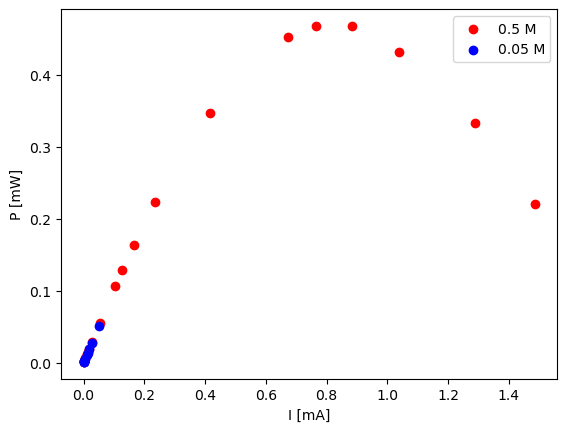

In [162]:
plt.scatter(D05.I,D05.P,color='r',label='0.5 M')
plt.scatter(D005.I,D005.P,color='b',label='0.05 M')
plt.xlabel('I [mA]')
plt.ylabel('P [mW]')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


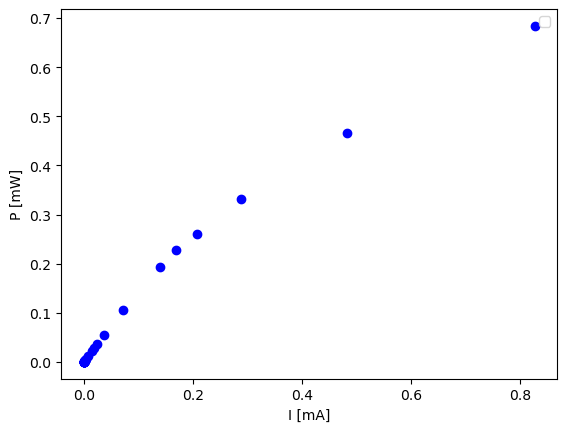

In [163]:
plt.scatter(lec.I,lec.P,color='b')

plt.xlabel('I [mA]')
plt.ylabel('P [mW]')
plt.legend()

In [164]:
#z05=np.arange(0,D05.I[-1]+0.3,0.1)
#z005=np.arange(0,D005.I[-1]+0.85,0.1)
#a,b,c=D05.regresja()[0]
#plt.plot(z05,c+b*z05+a*(z05**2), color='r', linestyle=':')
#a,b,c=D005.regresja()[0]
#plt.plot(z005,c+b*z005+a*(z005**2), color='b', linestyle=':')

In [165]:
D05.SEM, D005.SEM

(1.0949, 1.0742)

In [166]:
np.mean(D05.R_w()[9:]), np.mean(D005.R_w()[6:])

(647.6372855315941, 1226.5960068017137)

In [167]:
D05.E_el(), D005.E_el()

(211282.853, 207288.374)

In [168]:
#0.5     #0.05
1.087*2*96485,  1.097*2*96485

#209.758 kJ ,   211.688 kJ 

(209758.38999999998, 211688.09)

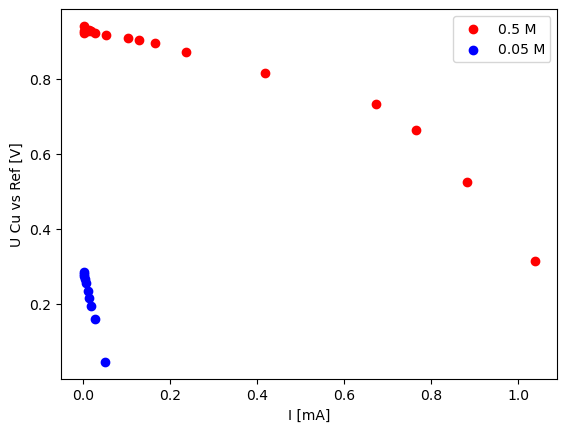

In [169]:
plt.scatter(D05.I[:-2],D05.Cu[:-2],color='r',label='0.5 M')
plt.scatter(D005.I,D005.Cu,color='b',label='0.05 M')
plt.xlabel('I [mA]')
plt.ylabel('U Cu vs Ref [V]')
plt.legend()

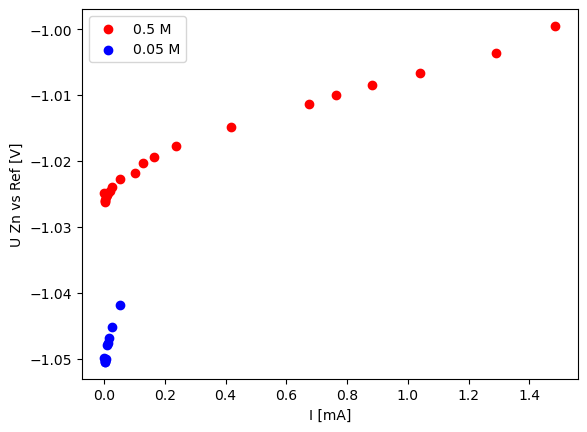

In [170]:
plt.scatter(D05.I,D05.Zn,color='r',label='0.5 M')
plt.scatter(D005.I,D005.Zn,color='b',label='0.05 M')
plt.xlabel('I [mA]')
plt.ylabel('U Zn vs Ref [V]')
plt.legend()

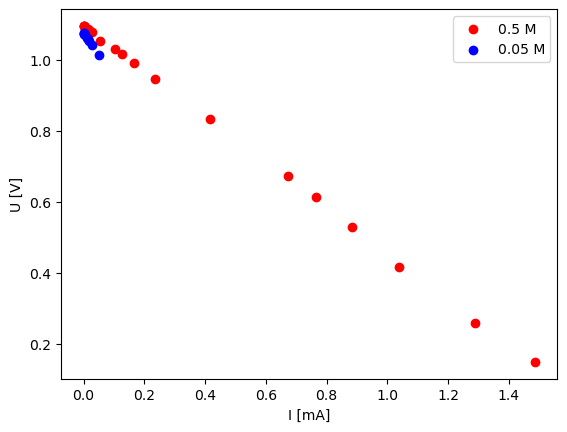

In [171]:
plt.scatter(D05.I,D05.napiecie,color='r',label='0.5 M')
plt.scatter(D005.I,D005.napiecie,color='b',label='0.05 M')
plt.xlabel('I [mA]')
plt.ylabel('U [V]')
plt.legend()

Text(0, 0.5, 'U [V]')

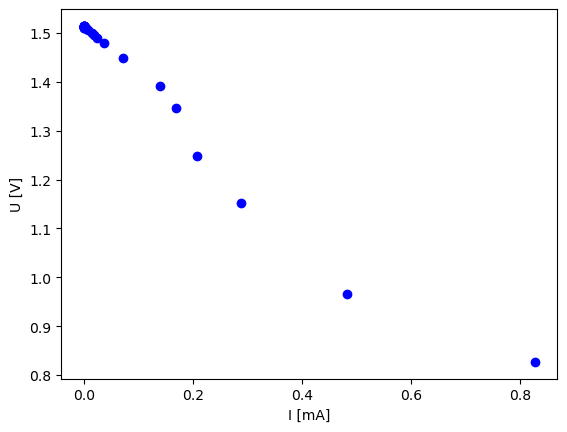

In [172]:
plt.scatter(lec.I,lec.napiecie,color='b')
plt.xlabel('I [mA]')
plt.ylabel('U [V]')
